This notebook explores the building types surround identified fatality hot spots. You'll see throughout some analysis is applied to three points to use as test cases, and some are applied to the 80 hotspots we identified, which is the goal to be able to analyze.

Author: Danielle Parnes

## Import Libraries

In [2]:
# download the osm data
import osmnx as ox

# for network analysis
import networkx as nx

# to be able to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

#for plotting
import matplotlib.pyplot as plt



## Import Location Data for 80 Fatality Points + Get into Clean Geodataframe

In [3]:
dfbuildings = pd.read_csv('data/locations.csv')

In [4]:
dfbuildings

,point_x,point_y,match_addr
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA"
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA"
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA"
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA"
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA"
...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA"
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA"
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA"
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA"


In [5]:
#rename the columns
dfbuildings.columns = ['lon','lat','address']
dfbuildings

,lon,lat,address
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA"
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA"
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA"
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA"
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA"
...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA"
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA"
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA"
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA"


In [6]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdfbuildings = gpd.GeoDataFrame(dfbuildings, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(dfbuildings.lon, dfbuildings.lat)) 

#for "df.longitude" you put in whatever that column is called, can also use df['longitude'] especially if there is a space in column title 

In [7]:
gdfbuildings

,lon,lat,address,geometry
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",POINT (-118.27032 34.06666)
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",POINT (-118.26521 33.92548)
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",POINT (-118.33348 34.07616)
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",POINT (-118.25608 34.01604)
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",POINT (-118.25652 33.95390)
...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",POINT (-118.30902 33.96726)
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",POINT (-118.30902 33.96621)
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",POINT (-118.36251 34.06303)
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",POINT (-118.57142 34.17699)


In [8]:
# add new columns to geodataframe
gdfbuildings['Building'] = 0
gdfbuildings['Retail'] = 0

In [9]:
gdfbuildings

,lon,lat,address,geometry,Building,Retail
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",POINT (-118.27032 34.06666),0,0
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",POINT (-118.26521 33.92548),0,0
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",POINT (-118.33348 34.07616),0,0
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",POINT (-118.25608 34.01604),0,0
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",POINT (-118.25652 33.95390),0,0
...,...,...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",POINT (-118.30902 33.96726),0,0
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",POINT (-118.30902 33.96621),0,0
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",POINT (-118.36251 34.06303),0,0
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",POINT (-118.57142 34.17699),0,0


<AxesSubplot:>

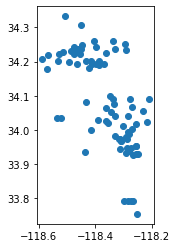

In [10]:
gdfbuildings.plot()

## Import Location Data for 3 Example Points + Get into Clean Geodataframe

In [11]:
# configure the locations I want to look at, using the "graph from a point" method. I'm making three center points of the three selected locations as examples.
point_1 = (34.18670122912705, -118.44872393539862)
point_2 = (34.04504940058153, -118.24149202214933)
point_3 = (33.96732894334928, -118.30465163691275)

In [12]:
# get the data from OSM that are buildings for 1/8 of a mile distance around each of my selected points
G_1 = ox.geometries_from_point(point_1,tags={'building':True},dist=200)
G_2 = ox.geometries_from_point(point_2,tags={'building':True},dist=200)
G_3 = ox.geometries_from_point(point_3,tags={'building':True},dist=200)

In [13]:
#look at how many of each type of building are around each location
G1_building_counts = G_1.building.value_counts()

# convert G1 into a dataframe
df_G1_building_counts = pd.DataFrame(G1_building_counts)

#reset the G1 index
df_G1_building_counts = df_G1_building_counts.reset_index()

#rename the G1 columns
df_G1_building_counts.columns = ['building_type','count']
df_G1_building_counts

df_G1_building_counts

,building_type,count
0,retail,69
1,commercial,37
2,yes,14
3,school,2
4,industrial,1


In [14]:
#look at how many of each type of building are around each location
G2_building_counts = G_2.building.value_counts()

# convert G2 into a dataframe
df_G2_building_counts = pd.DataFrame(G2_building_counts)

#reset the G2 index
df_G2_building_counts = df_G2_building_counts.reset_index()

#rename the G2 columns
df_G2_building_counts.columns = ['building_type','count']
df_G2_building_counts

df_G2_building_counts

,building_type,count
0,retail,25
1,warehouse,22
2,commercial,19
3,industrial,18
4,factory,9
5,yes,5
6,house,4
7,hotel,3
8,apartments,2


In [15]:
#look at how many of each type of building are around each location
G3_building_counts = G_3.building.value_counts()

# convert G3 into a dataframe
df_G3_building_counts = pd.DataFrame(G3_building_counts)

#reset the G3 index
df_G3_building_counts = df_G3_building_counts.reset_index()

#rename the G3 columns
df_G3_building_counts.columns = ['building_type','count']
df_G3_building_counts

df_G3_building_counts

,building_type,count
0,house,317
1,apartments,68
2,residential,65
3,yes,1


## COUNTING BUILDING TYPES:

## Building types from the three sample points

Text(0.5, 1.0, 'San Fernando Valley')

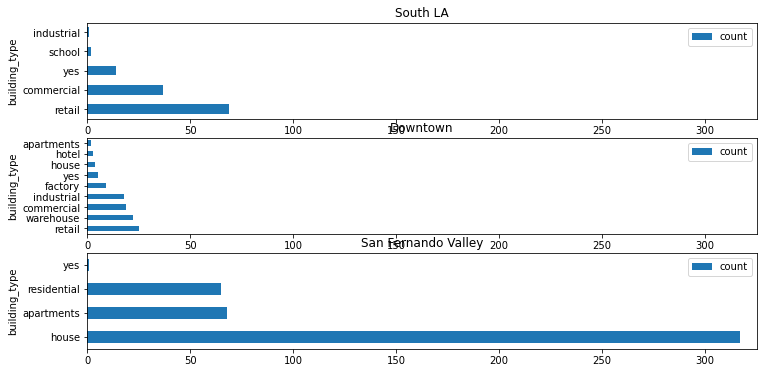

In [16]:
#Plotting building type counts

# create the 1x3 subplots
fig, axs = plt.subplots(3,1, figsize=(15, 12))

# name each subplot
ax1, ax2, ax3 = axs

#plot building counts
df_G1_building_counts.plot.barh(figsize=(12,6),
                                x='building_type',
                               ax=ax1)
df_G2_building_counts.plot.barh(figsize=(12,6),
                                x='building_type',
                               ax=ax2)
df_G3_building_counts.plot.barh(figsize=(12,6),
                                x='building_type',
                               ax=ax3)

#set x axis to be consistent across the three charts for easier comparison
ax1.set_xlim([0, 325])
ax2.set_xlim([0, 325])
ax3.set_xlim([0, 325])

#add titles so we know where each point is
ax1.set_title("South LA")
ax2.set_title("Downtown")
ax3.set_title("San Fernando Valley")

## Building types for 80 points

**Create Function to count building types**

Here the goal is to run a function and loop so that I can create bar charts that include the building types around all 80 points. 

In [17]:
def analyze_buildinguse(lat,lon):

    #call osmnx with a lat/long pair
    G = ox.geometries_from_point((lat,lon),tags={'building':True},dist=200)
    
    #return observations as a dictionary
    
    d = dict()
    
    try:
        d['retail']=len(G[G['building'] == 'retail'])
        
    except:
        d['retail']=0
    return d
    

In [18]:
#check to see if function works
analyze_buildinguse(34.18670122912705, -118.44872393539862)

{'retail': 69}

**Create Loop to run function on each row of location data**

In [19]:

#create loop
for index, row in gdfbuildings.iterrows():
    print(str(index)+'...')
    #call the function
    newdata = analyze_buildinguse(row.lat,row.lon)
    
    
    #add data to existing gdf column
    gdfbuildings.loc[index, 'Retail'] = newdata['retail']


0...
1...
2...
3...
4...
5...
6...
7...
8...
9...
10...
11...
12...
13...
14...
15...
16...
17...
18...
19...
20...
21...
22...
23...
24...
25...
26...
27...
28...
29...
30...
31...
32...
33...
34...
35...
36...
37...
38...
39...
40...
41...
42...
43...
44...
45...
46...
47...
48...
49...
50...
51...
52...
53...
54...
55...
56...
57...
58...
59...
60...
61...
62...
63...
64...
65...
66...
67...
68...
69...
70...
71...
72...
73...
74...
75...
76...
77...
78...
79...
80...
81...


In [20]:
## still can't get this to work! But know it is possible!

## VISUALIZING BUILDING TYPES

In [21]:
# download the osm data
import osmnx as ox

# to be able to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

import matplotlib.pyplot as plt

## With three points

In [22]:
## set specific colors for each building type
building_palette = {'apartments': '#005f73',
                    'commercial': '#0a9396',
                    'factory': '#94d2bd',
                    'hotel': '#e9d8a6',
                    'house': '#ee9b00',
                    'industrial': '#ca6702',
                    'retail': '#bb3e03',
                    'residential': '#ae2012', 
                    'school': '#9b2226',
                    'warehouse': '#001219',
                    'yes':'#52b788',
}
building_palette

{'apartments': '#005f73',
 'commercial': '#0a9396',
 'factory': '#94d2bd',
 'hotel': '#e9d8a6',
 'house': '#ee9b00',
 'industrial': '#ca6702',
 'retail': '#bb3e03',
 'residential': '#ae2012',
 'school': '#9b2226',
 'warehouse': '#001219',
 'yes': '#52b788'}

Text(0.5, 1.0, 'San Fernando Valley')

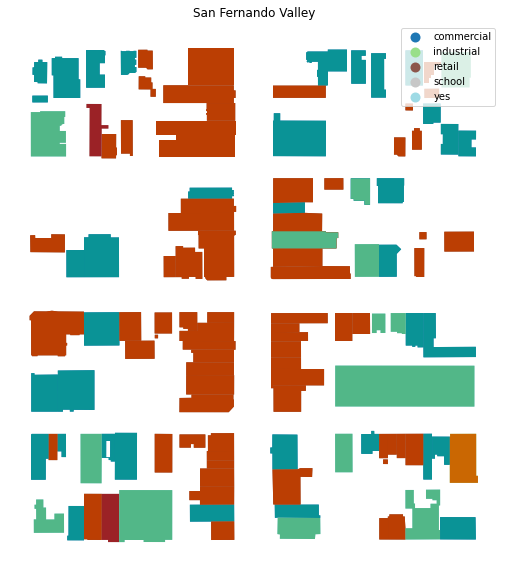

In [23]:
#let's try using the same code to create a map on it's own to see if the disappearing legend is coming from the subplot part?

ax = G_1.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

for ctype, data in G_1.groupby('building'):
    
    # Define the color for each group using the dictionary
    color = building_palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype,
              figsize=(10,10),
              legend=True)
ax.axis("off")
ax.set_title("San Fernando Valley")

Text(0.5, 1.0, 'Downtown')

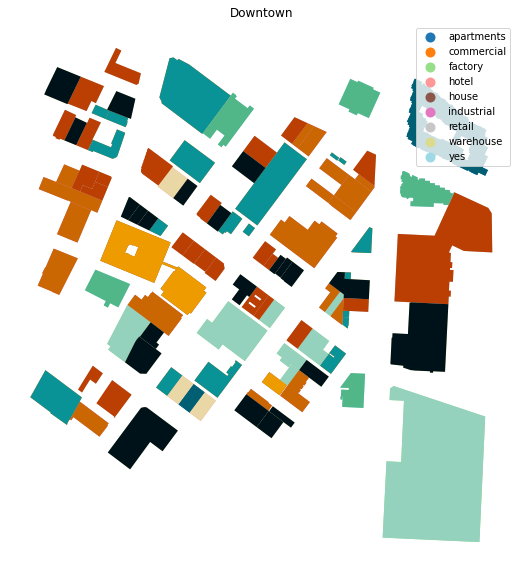

In [24]:
#let's try using the same code to create a map on it's own to see if the disappearing legend is coming from the subplot part?

ax = G_2.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

for ctype, data in G_2.groupby('building'):
    
    # Define the color for each group using the dictionary
    color = building_palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype,
              figsize=(10,10),
              legend=True)
ax.axis("off")
ax.set_title("Downtown")

Text(0.5, 1.0, 'South LA')

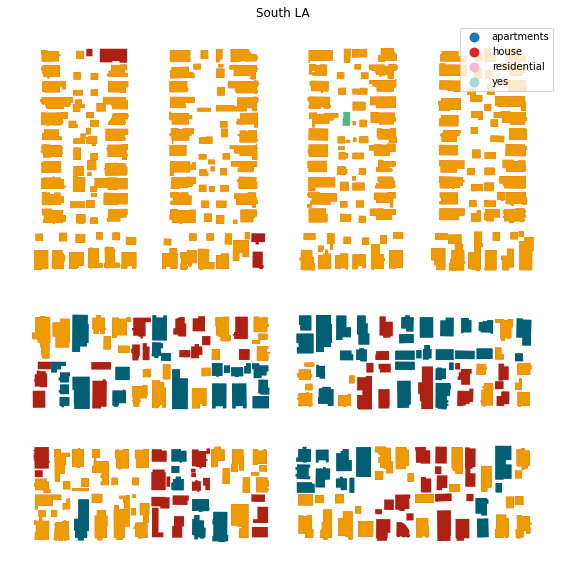

In [25]:
#let's try using the same code to create a map on it's own to see if the disappearing legend is coming from the subplot part?

ax = G_3.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

for ctype, data in G_3.groupby('building'):
    
    # Define the color for each group using the dictionary
    color = building_palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype,
              figsize=(10,10),
              legend=True)
ax.axis("off")
ax.set_title("South LA")

Text(0.5, 1.0, 'South LA')

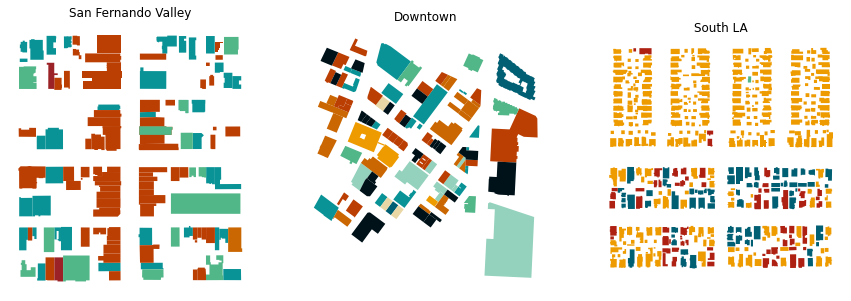

In [26]:
# create the 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 12))

# name each subplot
ax1, ax2, ax3 = axs

#point 1:

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in G_1.groupby('building'):
    
    # Define the color for each group using the dictionary
    color = building_palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax1,
              figsize=(10,10),
              legend=True,
             legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

ax1.axis("off")
ax1.set_title("San Fernando Valley")

#point 2:
# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in G_2.groupby('building'):
    
    # Define the color for each group using the dictionary
    color = building_palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax2,
              label=ctype,
              figsize=(10,10),
              legend=True)
ax2.axis("off")
ax2.set_title("Downtown")

#point3:
# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in G_3.groupby('building'):
    
    # Define the color for each group using the dictionary
    color = building_palette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax3,
              label=ctype,
              figsize=(10,10),
              legend=True)
ax3.axis("off")
ax3.set_title("South LA")

**Next step here would be to do a similar function/loop to run this for more than three points.**

In [27]:
# get the data from OSM that are buildings for 1/8 of a mile distance around each of my selected points
L_1 = ox.geometries_from_point(point_1,tags={'landuse':True},dist=200)
L_2 = ox.geometries_from_point(point_2,tags={'landuse':True},dist=200)
L_3 = ox.geometries_from_point(point_3,tags={'landuse':True},dist=200)

In [28]:
#look at how many of each type of building are around each location
L1_landuse_counts = L_1.landuse.value_counts()

# convert G1 into a dataframe
df_L1_landuse_counts = pd.DataFrame(L1_landuse_counts)

#reset the G1 index
df_L1_landuse_counts = df_L1_landuse_counts.reset_index()

#rename the G1 columns
df_L1_landuse_counts.columns = ['landuse','count']

df_L1_landuse_counts


,landuse,count
0,commercial,9
1,residential,1


In [29]:
#look at how many of each type of building are around each location
L2_landuse_counts = L_2.landuse.value_counts()

# convert G1 into a dataframe
df_L2_landuse_counts = pd.DataFrame(L2_landuse_counts)

#reset the G1 index
df_L2_landuse_counts = df_L2_landuse_counts.reset_index()

#rename the G1 columns
df_L2_landuse_counts.columns = ['landuse','count']

df_L2_landuse_counts


,landuse,count
0,residential,2
1,commercial,2
